In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Plots import plot_best_episode
from ipyfilechooser import FileChooser
from Plots import plot_best_episode, plot_populations, plot_pulses
from QEnvs.QEnvWave import QEnvWave

fc = FileChooser('logs/')
display(fc)

2023-06-13 21:52:45.378972: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 21:52:46.856241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


FileChooser(path='/home/pabolojo/Escritorio/Curso_5/TFG/Cluster/MLQTransfer/Codes/logs', filename='', title=''…

Final Target Population:  0.8878178458190684
Max Target Population:  0.890579835739886
Max intermidiate population:  0.3513244812474912


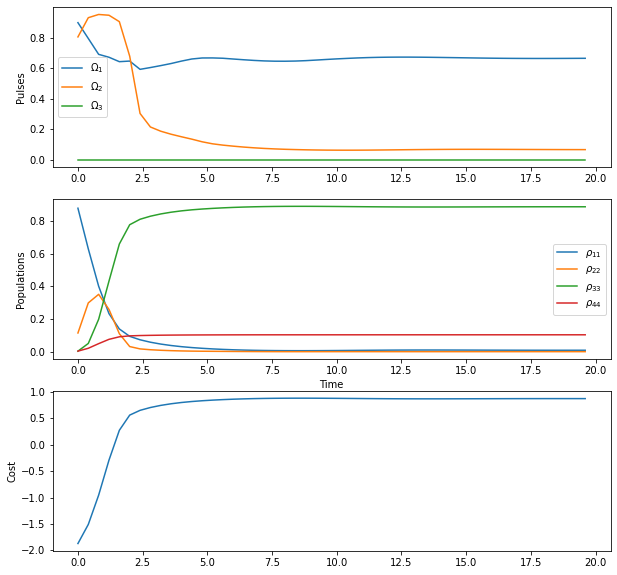

In [2]:
episode = np.load(fc.selected, allow_pickle=True)
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
plot_best_episode(episode, ax)
off = 1
print("Final Target Population: ", episode[3][:, :-1][-1-off, -1])
print("Max Target Population: ", np.max(episode[3][:, :-1][-1-off, :]))
print("Max intermidiate population: ", np.max(episode[3][:, :-1][1:-1-off, :]))

In [12]:
populations = episode[3][:, :-1].T
np.sum(np.array(populations), axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
num_steps = episode[1].shape[0] - 1
num_qubits = episode[2].shape[0]
pulses = episode[2][:-1].T
time_max = episode[1][-1]

In [4]:
def dummy_cost_function(env):
    return 0.0

def calculate_populations(env, pulse):
    times = env.times
    populations = []
    for state in env.run_qevolution(pulse):
        populations.append(np.abs(state) ** 2)
    return times, np.array(populations).reshape((num_steps, num_qubits))

Max pulses:  0.9520646333694458
Max intermediate population:  0.4029959952040459
Final population:  0.9955917489027402


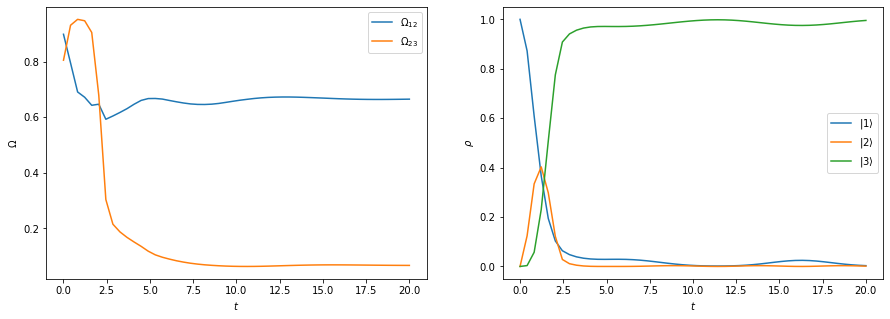

In [5]:
env = QEnvWave(num_qubits=num_qubits,
                   time_max=time_max,
                   num_steps=num_steps - 1,
                   cost_function=dummy_cost_function)
times_sta, populations_sta = calculate_populations(env, pulses)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_pulses(times_sta, pulses, ax=ax[0])
plot_populations(times_sta, populations_sta, ax=ax[1])
print("Max pulses: ", np.max(pulses))
print("Max intermediate population: ", np.max(populations_sta.T[1:-1]))
print("Final population: ", populations_sta[-1][-1])

In [6]:
np.sum(np.array(populations_sta), axis=1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999])